### Import Required Libraries
- Load the necessary libraries to read the data, perform data manipulation, and conduct analysis operations effectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Read Data
- Load the data file and import the dataset for further analysis and processing. 

In [2]:
data=pd.read_csv('./Melbourne_housing_FULL.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Check the Shape of the Data
- To examine the number of rows and columns in the dataset, 34857 rows and 21 columns are present.

In [3]:
data.shape

(34857, 21)

### Information About Data
- 34857 entries with 21 columns 
- There are null values present in the columns.
- 8 columns are categorical and 13 are numerical 


In [4]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

### Null Value Count
- There are null values present in most of the columns
- buildingarea being the highest with 21115 null values followed by yearbuilt 19306 and landsize 11810
- regionname, propertycount, councilarea distance, postcode have less null vaules
- Price(target column)column has 7610 null values 

In [5]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### Selecting Relevant Columns for Analysis
- The dataset contains 21 columns, some of which have null values and may not be relevant for our analysis. We will focus only on the columns that are pertinent to our analysis, ensuring that the target column is positioned at the end.

In [6]:
data=data[['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 
               'Propertycount', 'Distance','Bedroom2', 'Bathroom', 'Car', 
               'Landsize', 'BuildingArea', 'Price']]

### Fill Null values
- Fill the null values with zero to assess the impact of missing data on the analysis. 
- Since null values are present in features that are relevant or correlated with the target column, replace the missing values with either the median or mean.
- Additionally, remove all null values from the target column to ensure it is clean and free from missing data, allowing for accurate analysis.

In [7]:
col_to_fill_zero=["Propertycount","Distance","Bedroom2","Bathroom","Car"]
data[col_to_fill_zero]=data[col_to_fill_zero].fillna(0)
data["Landsize"]=data["Landsize"].fillna(data.Landsize.mean())
data["BuildingArea"]=data["BuildingArea"].fillna(data.BuildingArea.mean())
data.dropna(subset=["Price","Regionname"], inplace=True)

### Find Outliers
- Remove outliers from all numerical columns to minimize their impact on the analysis, except for the target column.
-  It's important not to manipulate the target column, as altering it could lead to inaccurate results and skew the analysis.

In [8]:
for i in data.columns[:-1]:
    if data[i].dtype==object:
        continue
    else:
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)
        iqr=Q3-Q1
        low=Q1-(1.5*iqr)
        high=Q3+(1.5*iqr)
        print(i,' :',len(data[(data[i]<low) | (data[i]>high)]))
        data.loc[(data[i]<low) | (data[i]>high), i]=data[i].median()
        print(i,' :',len(data[(data[i]<low) | (data[i]>high)]))

Rooms  : 23
Rooms  : 0
Propertycount  : 727
Propertycount  : 0
Distance  : 1188
Distance  : 0
Bedroom2  : 38
Bedroom2  : 0
Bathroom  : 238
Bathroom  : 0
Car  : 151
Car  : 0
Landsize  : 981
Landsize  : 0
BuildingArea  : 9738
BuildingArea  : 0


### Find the Correlation
- finding correlation is going to helps in selecting independent features and dependent variable
- Identify the features which shows correlation with the target variable

In [9]:
data.select_dtypes(include='number').corr()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
Rooms,1.000000,-0.069484,0.311482,0.554088,0.411772,0.348026,0.362793,-0.039481,0.464536
Propertycount,-0.069484,1.000000,-0.078625,-0.028384,-0.013974,-0.027420,-0.046722,0.007199,-0.010364
Distance,0.311482,-0.078625,1.000000,0.156576,0.100343,0.191976,0.344302,-0.025469,-0.167219
Bedroom2,0.554088,-0.028384,0.156576,1.000000,0.838180,0.717833,0.021490,-0.065623,0.299756
Bathroom,0.411772,-0.013974,0.100343,0.838180,1.000000,0.645191,-0.080908,-0.066235,0.275152
Car,0.348026,-0.027420,0.191976,0.717833,0.645191,1.000000,0.099695,-0.048828,0.202983
Landsize,0.362793,-0.046722,0.344302,0.021490,-0.080908,0.099695,1.000000,-0.004623,0.182581
BuildingArea,-0.039481,0.007199,-0.025469,-0.065623,-0.066235,-0.048828,-0.004623,1.000000,0.001780
Price,0.464536,-0.010364,-0.167219,0.299756,0.275152,0.202983,0.182581,0.001780,1.000000


## Univariate Analysis
- In univariate analysis, analyze each variable by plotting various charts such as histograms, boxplots, KDE plots, and quantile-quantile (QQ) plots, along with statistical values like mean, median, min, max, standard deviation, and skewness to understand the spread and distribution of the data.

In [10]:
import matplotlib.pyplot as plt
import scipy.stats as stats
def numerical(df, column):
    print(df[column].agg(['min','max','mean','std','skew']))
    print()
    # distribution
    plt.figure(figsize=(8,6), layout= 'constrained')
    ## histogram
    plt.subplot(2,2,1)
    df[column].plot(kind='hist', bins=20)
    plt.title("Histogram plot")
    plt.xlabel(column)
    plt.ylabel('frequency')

    plt.subplot(2,2,2)
    df[column].plot(kind='kde')
    plt.title('KDE plot')
    plt.xlabel(column)

    plt.subplot(2,2,3)
    df[column].plot(kind='box')
    plt.title('Box plot')

    plt.subplot(2,2,4)
    stats.probplot(df[column], dist='norm', plot=plt)
    plt.title('QQ for normal distribution')

### Propertycount 
- Skewness of 0.62 shows most of the data points present to the right(right skewed)
- values 

min        83.000000
max     17496.000000
mean     7164.294634
std      3841.015319
skew        0.624221
Name: Propertycount, dtype: float64



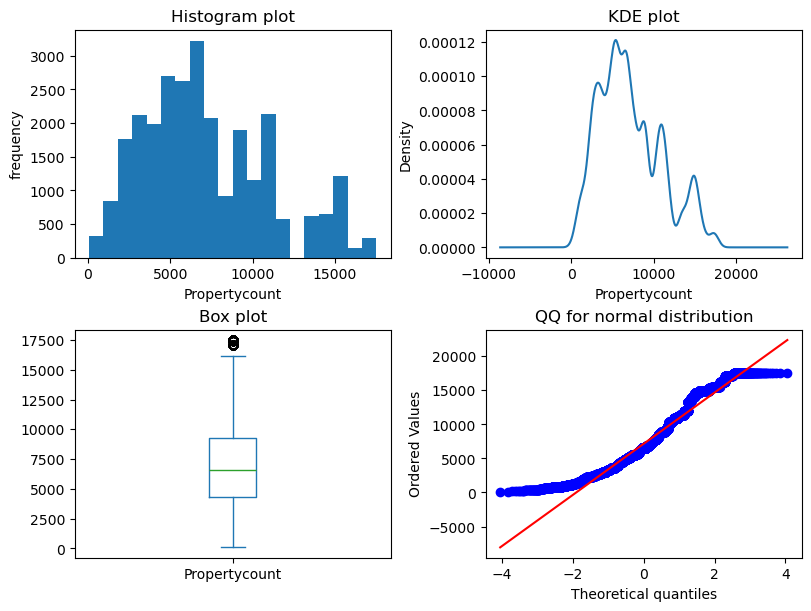

In [11]:
numerical(data, "Propertycount")

### Distance
- The distance column has a range of values from 0 to 25, with a mean of 10, indicating that most of the data points are centered around 10.
1. The standard deviation of 5 suggests moderate variability, meaning that while most values are close to the mean, there is still some spread around it.
2. A skewness of 0.48 indicates a slight right skew, meaning that the data has a longer tail on the right side, with a few values extending beyond the mean.
3.  This suggests that while the majority of the observations are clustered around the lower to middle values, there are some higher values that pull the distribution towards the right.

min      0.000000
max     25.200000
mean    10.347390
std      5.035124
skew     0.489898
Name: Distance, dtype: float64



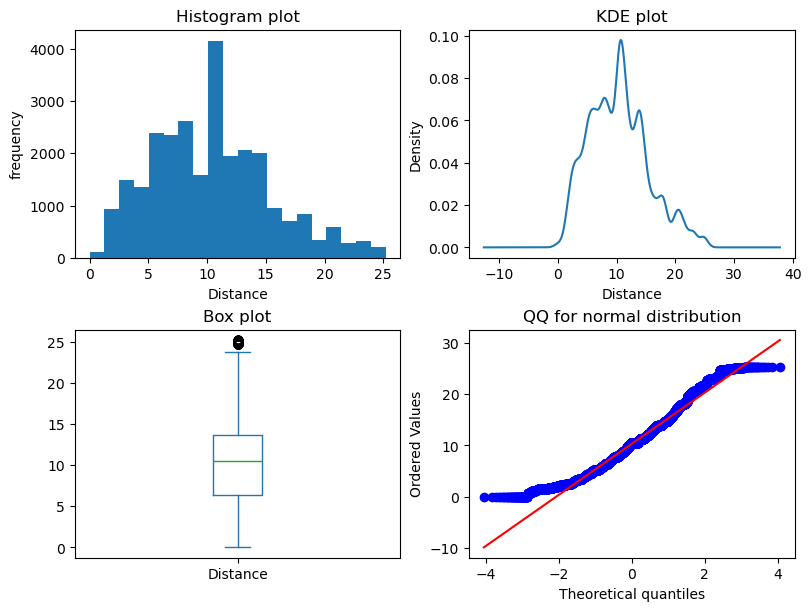

In [12]:
numerical(data, "Distance")

### Bedroom2
- The range of values in this column spans from 0 to 6, with a mean of 2.32, indicating that the majority of the data points are centered around this value.
1. The standard deviation of 1.52 suggests moderate variability, meaning that most values are spread within 1.52 units of the mean, but there is still some variation around it.
2.  A skewness of -0.34 indicates a slight left skew, meaning the data has a small tail extending towards lower values.
3.   This suggests that while the majority of the observations are clustered around the higher values, there are a few lower values pulling the distribution towards the left.

min     0.000000
max     6.000000
mean    2.318822
std     1.520127
skew   -0.338023
Name: Bedroom2, dtype: float64



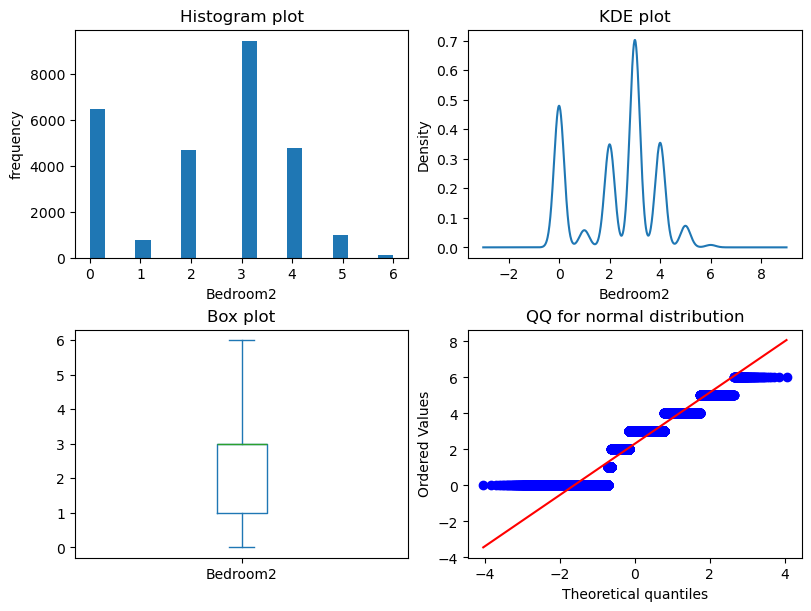

In [13]:
numerical(data, "Bedroom2")

### Bathroom
- The Bathroom column has a range of values from 0 to 3, with a mean of 1.19, indicating that most properties have around 1 bathroom.
1. The standard deviation of 0.86 suggests moderate variability, meaning that while most properties have 1 bathroom, there is some spread with a few properties having more or fewer bathrooms.
2.  The skewness of 0.17 indicates a slight right skew, meaning the distribution has a small tail on the higher side, implying that there are a few properties with more bathrooms, but the majority still have fewer.

min     0.000000
max     3.000000
mean    1.185729
std     0.860028
skew    0.166202
Name: Bathroom, dtype: float64



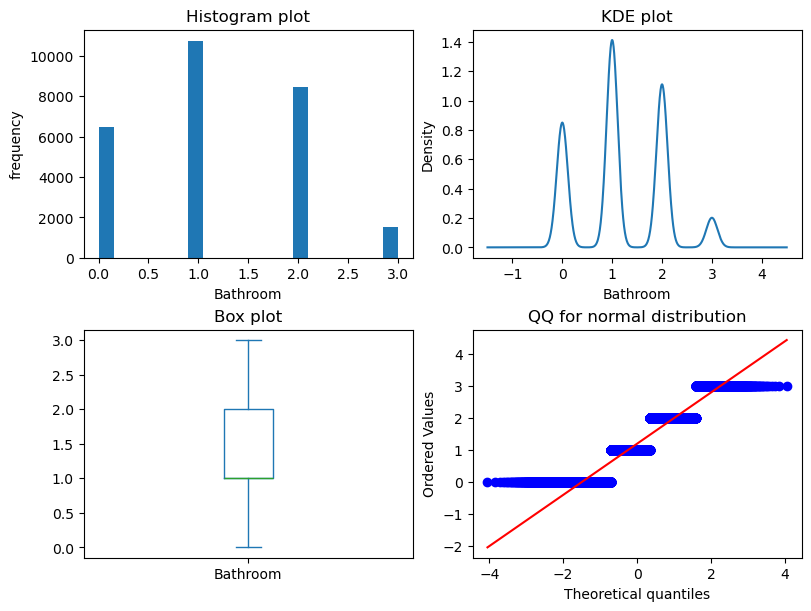

In [14]:
numerical(data, "Bathroom")

### BuildingArea
- The range of values in this column spans from 0 to 1143, with a mean of 420.49, indicating that most of the data points are centered around 420.
1. The standard deviation of 222.75 suggests significant variability, meaning there is a considerable spread of values around the mean.
2. A skewness of -0.56 indicates a slight left skew, meaning the data has a longer tail on the lower side, with a few values pulling the distribution towards the left.
3. This suggests that while most values are higher, there are some extreme lower values that cause the leftward skew

min     150.000000
max     166.000000
mean    160.149681
std       1.083818
skew     -6.365728
Name: BuildingArea, dtype: float64



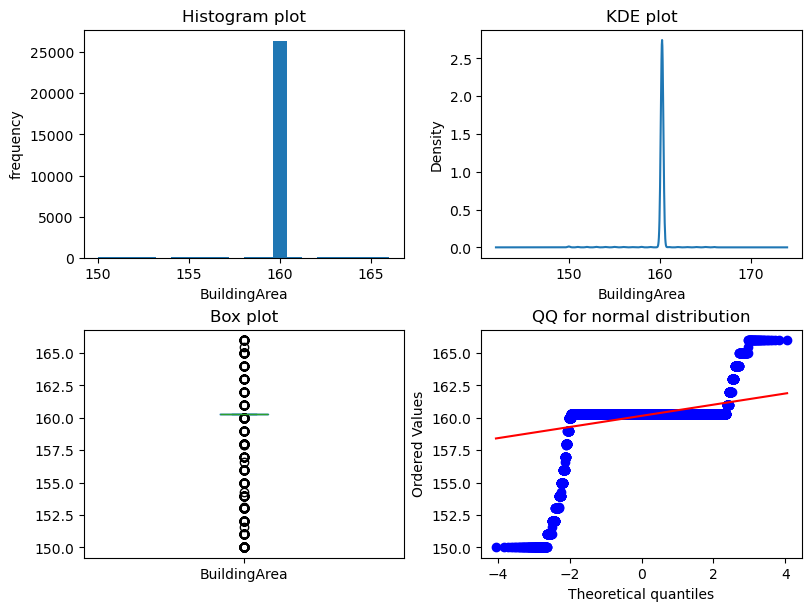

In [15]:
numerical(data, "BuildingArea")

### Price
- The range of values in this column spans from 85,000 to 11,200,000, with a mean of 1,050,210, indicating that most of the data points are centered around this value.
1. The standard deviation of 641,492 suggests significant variability, meaning there is a large spread of values around the mean.
2.  A skewness of 2.59 indicates a strong right skew, meaning the data has a long tail on the right side, with several higher values pulling the distribution towards the right.
3.   This suggests that while most values are concentrated in the lower to middle range, there are a few extreme high values that significantly influence the distribution.

min     8.500000e+04
max     1.120000e+07
mean    1.050210e+06
std     6.414923e+05
skew    2.588797e+00
Name: Price, dtype: float64



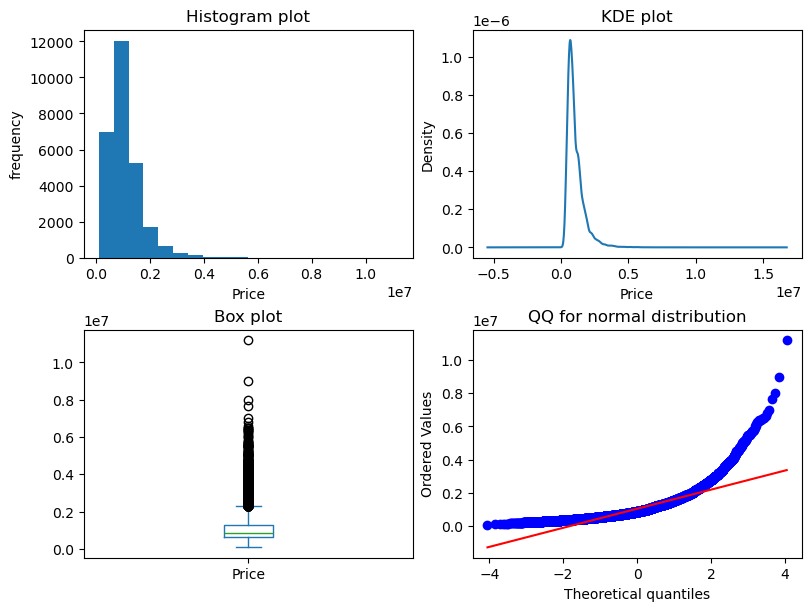

In [16]:
numerical(data, "Price")

## Bivariate Analysis
- In bivariate analysis, we examine the relationship between two variables simultaneously.

1. **Numerical vs. Numerical:**
A scatter plot is the most effective way to visualize this, as it helps us understand how the two variables are correlated.

2. **Categorical vs. Categorical:**
When dealing with two categorical variables, the relationship is best visualized using a crosstab or a grouped stacked bar chart.

3. **Categorical vs. Numerical:**
For a categorical variable and a numerical variable, we can use bar charts and box plots to show comparisons or the distribution of numerical values across different categories.

- The scatter plots reveal various relationships between Price and different features. Rooms shows the strongest positive correlation with price (0.46), indicating that more rooms generally lead to higher property prices. Building Area and Landsize also have moderate positive correlations, suggesting that larger properties tend to be more expensive. In contrast, Bathroom, Bedroom2, and Propertycount have weaker correlations, implying they have less influence on price. While the number of rooms is a significant factor, other variables like size and location play important roles in determining the price.

Text(0.5, 1.0, 'Price vs Rooms')

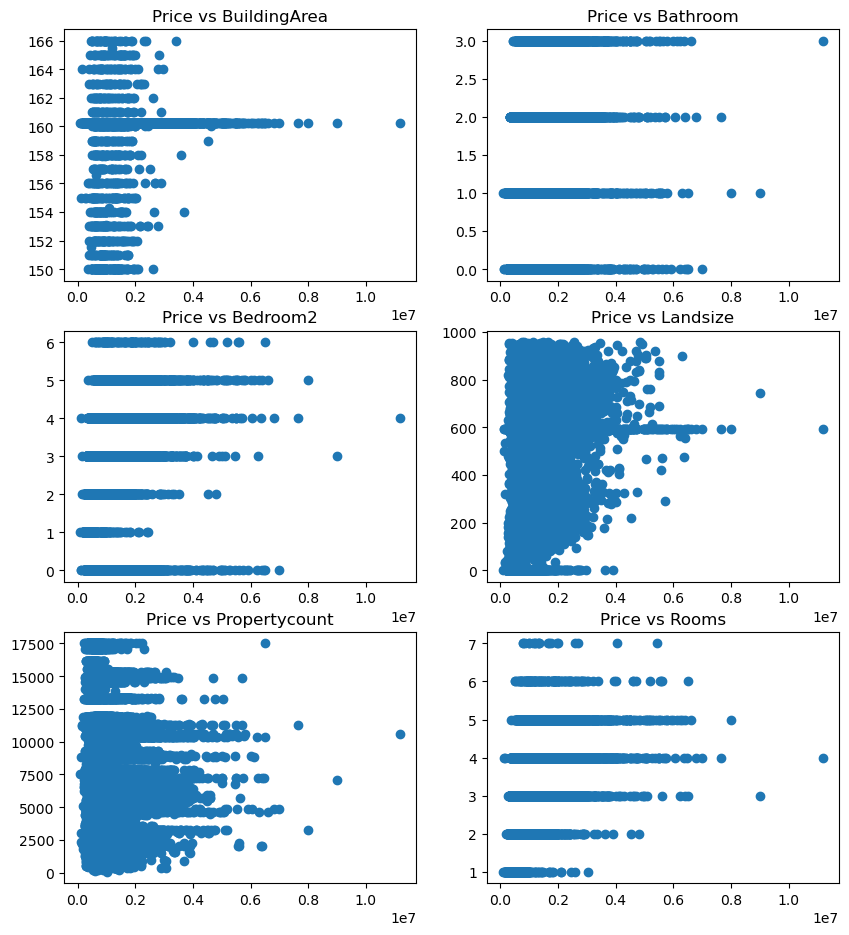

In [17]:
plt.figure(figsize=(10,15))
plt.subplot(4,2,1)
plt.scatter(x=data["Price"],y=data["BuildingArea"])
plt.title("Price vs BuildingArea")
plt.subplot(4,2,2)
plt.scatter(x=data["Price"],y=data["Bathroom"])
plt.title("Price vs Bathroom")
plt.subplot(4,2,3)
plt.scatter(x=data["Price"],y=data["Bedroom2"])
plt.title("Price vs Bedroom2")
plt.subplot(4,2,4)
plt.scatter(x=data["Price"],y=data["Landsize"])
plt.title("Price vs Landsize")
plt.subplot(4,2,5)
plt.scatter(x=data["Price"],y=data["Propertycount"])
plt.title("Price vs Propertycount")
plt.subplot(4,2,6)
plt.scatter(x=data["Price"],y=data["Rooms"])
plt.title("Price vs Rooms")

- The bar chart reveals that Vendor Bid (VB) is the most common sales method, suggesting many properties were passed in at auction without selling. Private Sale (PI) follows as the second most frequent method, indicating a preference for private negotiations. Sold After (SA) is the least common, implying fewer properties are sold after being passed in at auction. This suggests a market where auction prices are not always met, leading to alternative sales methods.

Text(0.5, 1.0, 'Price vs Method')

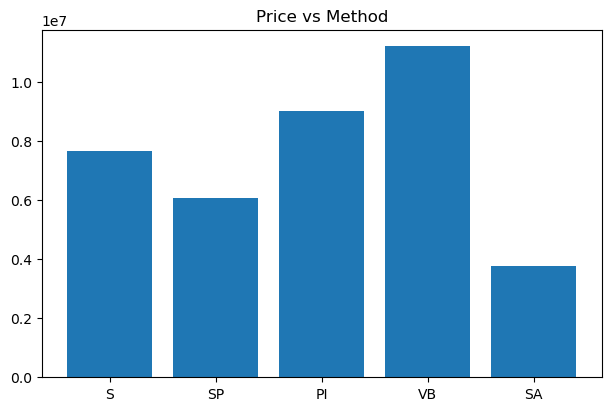

In [18]:
plt.figure(figsize=(6,4), layout = "constrained")

plt.bar(x=data["Method"],height=data["Price"])
plt.title("Price vs Method")

## Multivariate Analysis
- Multivariate analysis is used when we compare more than two variables simultaneously to understand the relationships between them.
1. A pairplot is one of the best plots for visualizing this, as it shows pairwise relationships between multiple variables in the dataset.
2. Additionally, it helps in identifying patterns, correlations, and trends across various combinations of columns, providing a comprehensive view of the interactions in the data.

In [19]:
# sns.pairplot(data.select_dtypes(include='number'))

### Find Unique Values in Categorical Columns
As we move forward to apply machine learning algorithms, it's essential to convert all our features into numerical values. First, we will identify the unique values in all categorical columns to understand the distinct categories present.

In [20]:
data.select_dtypes(include="object").nunique()

Suburb        344
Type            3
Method          5
SellerG       349
Regionname      8
dtype: int64

###  convert category to numeric
we will use the get_dummies function to convert these categorical variables into numerical ones. By setting drop_first=True, we drop the first category in each categorical column to avoid multicollinearity and reduce redundancy. This step ensures that all features are in a format that can be used by machine learning models. Afterward, we can proceed with scaling or normalizing the data if necessary for the model.

In [21]:
data=pd.get_dummies(data, drop_first=True)

In [22]:
data.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,True,False,False,False,False,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,160.2564,1035000.0,False,...,False,False,False,False,True,False,False,False,False,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,True,False,False,False,False,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,True,False,False,False,False,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,160.2564,1600000.0,False,...,False,False,False,False,True,False,False,False,False,False


### check the shape of data
After converting all categorical columns into numerical values, we now have a dataset with only numerical features. This prepares us to smoothly move forward and apply the machine learning algorithm. With the data properly formatted, we can proceed to train and evaluate the model for accurate predictions.

In [23]:
data.shape

(27244, 713)

## Linear Regression Algorithm
- Linear regression is a supervised machine learning algorithm used to model the relationship between a dependent variable (target) and one or more independent variables (features).

### libraries and module require 
- StandardScaler is used for scaling the features of your dataset. 

- train_test_split is used to split your dataset into training and testing subsets.

- LinearRegression is used to apply the simple or multiple linear regression algorithm. It establishes a linear relationship between the independent variables (features) and the dependent variable (target) by fitting a line (or hyperplane in higher dimensions) to the data.

- Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression model that includes L1 regularization to prevent overfitting.

- Ridge regression is used when the model may suffer from multicollinearity or when the dataset has more features than observations.

- ElasticNet is a linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt
import seaborn as sns

## simple linear regression
In simple linear regression, we model the relationship between a single independent variable and the target variable. Scaling is not necessary since we're dealing with just one feature and a target. To visualize this relationship, we can use sns.regplot(), which plots the data points along with the best-fit line, helping us assess the linearity between the two features. 

**Insights:** The R² score of 0.21 for the training set and 0.22 for the testing set indicates that the model explains only about 21-22% of the variance in the target variable for both datasets. This suggests that the model's predictive power is relatively low, and it may not be capturing the underlying patterns in the data effectively.

**for ridge**
The ridge score of 0.21 for the training set and 0.22 for the testing set. This indicates that the model has a relatively low predictive power

**for lasso**
The lasso score of 0.21 for the training set and 0.22 for the testing set like the Ridge model, the Lasso model also has limited predictive power and may not be effectively capturing the relationships in the data.

**for elasticnet**
The elasticnet score of 0.21 for the training set and 0.22 for the testing set similar to Ridge and Lasso, has a relatively low predictive power and may not be effectively capturing the underlying patterns in the data.

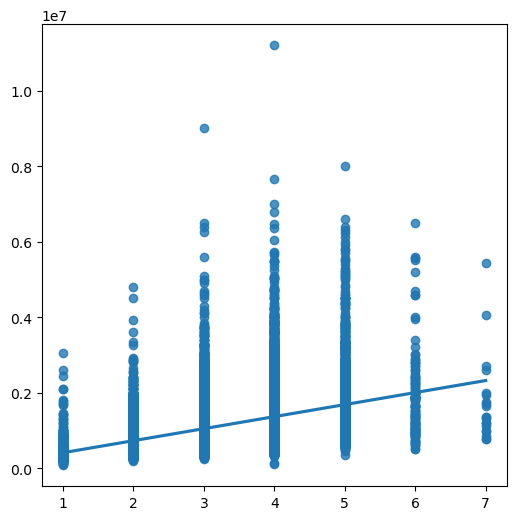

MSE TRAINING  : 322977115867.8121
r2 TRAINING   : 0.21446749854281988
*************************
MSE TESTING   : 321605990381.97345
r2 TESTING    : 0.2209693359256497

 RIDGE regression TRAINING  : 0.2144674979615666
*************************
 RIDGE regression TESTING   : 0.22096862664969363

 LASSO regression TRAINING  : 0.2144674985400602
*************************
 LASSO regression TESTING   : 0.22096928708866792

 ELASTICNET regression TRAINING : 0.1863656528321257
*************************
 ELASTICNET regression TESTING : 0.18885953366320918


In [25]:
input_variable=data["Rooms"].values.reshape(-1,1)
output_variable=data["Price"].values
plt.figure(figsize=(6,6))
sns.regplot(x=input_variable, y=output_variable);
plt.show()
input_train, input_test, output_train, output_test=train_test_split(input_variable, output_variable, test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(input_train, output_train)
# for training
output_train_predicted=model.predict(input_train)
print(f'MSE TRAINING  :' ,mean_squared_error(output_train, output_train_predicted))
print(f'r2 TRAINING   :' , r2_score(output_train, output_train_predicted))
print("*"*25)
# for testing
output_test_predicted=model.predict(input_test)
print(f'MSE TESTING   :' ,mean_squared_error(output_test, output_test_predicted))
print(f'r2 TESTING    :' , r2_score(output_test, output_test_predicted))
print()
# Ridge
input_variable=data["Rooms"].values.reshape(-1,1)
output_variable=data["Price"].values
input_train, input_test, output_train, output_test=train_test_split(input_variable, output_variable, test_size=0.2,random_state=42)
ridge_reg=Ridge()
ridge_reg.fit(input_train, output_train)
# for training
y_pred_ridge_train=ridge_reg.predict(input_train)
# for testing 
y_pred_ridge_test=ridge_reg.predict(input_test)
print(f' RIDGE regression TRAINING  :',ridge_reg.score(input_train, output_train))
print("*"*25)
print(f' RIDGE regression TESTING   :',ridge_reg.score(input_test, output_test))
print()
# lasso
input_variable=data["Rooms"].values.reshape(-1,1)
output_variable=data["Price"].values

input_train, input_test, output_train, output_test=train_test_split(input_variable, output_variable, test_size=0.2,random_state=42)

lasso_reg=Lasso()
lasso_reg.fit(input_train, output_train)
# for training
y_pred_lasso_train=lasso_reg.predict(input_train)
# for testing 
y_pred_lasso_test=lasso_reg.predict(input_test)
print(f' LASSO regression TRAINING  :',lasso_reg.score(input_train, output_train))
print("*"*25)
print(f' LASSO regression TESTING   :',lasso_reg.score(input_test, output_test))
print()
# elasticnet
input_variable=data["Rooms"].values.reshape(-1,1)
output_variable=data["Price"].values

input_train, input_test, output_train, output_test=train_test_split(input_variable, output_variable, test_size=0.2,random_state=42)

elasticnet_reg=ElasticNet()
elasticnet_reg.fit(input_train, output_train)
# for training
y_pred_elasticnet_train=elasticnet_reg.predict(input_train)
# for testing 
y_pred_elasticnet_test=elasticnet_reg.predict(input_test)
print(f' ELASTICNET regression TRAINING :',elasticnet_reg.score(input_train, output_train))
print("*"*25)
print(f' ELASTICNET regression TESTING :',elasticnet_reg.score(input_test, output_test))

## multiple regression
- Multiple regression is a method used to model the relationship between a dependent variable and two or more independent variables.

- The R² score of 0.67 on the training set and -1.26 on the testing set indicates overfitting. The model performs well on training data but poorly on unseen data, suggesting it has learned noise rather than general patterns.
Applying regularization techniques like Lasso, Ridge, and ElasticNet helps improve the model's generalization.

In [26]:
x=data.drop("Price", axis=1)
y=data["Price"]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=40)
model=LinearRegression()
model.fit(x_train, y_train)
# for training
y_train_predicted=model.predict(x_train)
print(f' MSE TRAINING ',mean_squared_error(y_train, y_train_predicted))
print(f' R2 TRAINING ',r2_score(y_train, y_train_predicted))
print("-"*50)
# for testing
y_test_predicted=model.predict(x_test)
print(f' MSE TESTING ',mean_squared_error(y_test, y_test_predicted))
print(f' R2 TESTING ',r2_score(y_test, y_test_predicted))
print()
# lasso multiple
input_variable=data.drop("Price", axis=1)
output_variable=data["Price"]
scaler=StandardScaler()
input_scaled=scaler.fit_transform(input_variable)
input_train, input_test, output_train, output_test=train_test_split(input_scaled, output_variable, test_size=0.2,random_state=42)
lasso_reg=Lasso()
lasso_reg.fit(input_train, output_train)
# for training
y_pred_lasso_train=lasso_reg.predict(input_train)
# for testing 
y_pred_lasso_test=lasso_reg.predict(input_test)
print(f' LASSO regression TRAINING :',lasso_reg.score(input_train, output_train))
print("*"*25)
print(f' LASSO regression TESTING  :',lasso_reg.score(input_test, output_test))
print()
# elasticnet multiple
input_variable=data.drop("Price", axis=1)
output_variable=data["Price"]
scaler=StandardScaler()
input_scaled=scaler.fit_transform(input_variable)
input_train, input_test, output_train, output_test=train_test_split(input_scaled, output_variable, test_size=0.2,random_state=42)
elasticnet_reg=ElasticNet()
elasticnet_reg.fit(input_train, output_train)
# for training
y_pred_elasticnet_train=elasticnet_reg.predict(input_train)
# for testing 
y_pred_elasticnet_test=elasticnet_reg.predict(input_test)
print(f' ELASTICNET regression TRAINING  :',elasticnet_reg.score(input_train, output_train))
print("*"*25)
print(f' ELASTICNET regression TESTING   :',elasticnet_reg.score(input_test, output_test))
print()
# ridge multiple
input_variable=data.drop("Price", axis=1)
output_variable=data["Price"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
input_scaled=scaler.fit_transform(input_variable)
from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test=train_test_split(input_scaled, output_variable, test_size=0.2,random_state=42)
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(input_train, output_train)
# for training
y_pred_ridge_train=ridge_reg.predict(input_train)
# for testing 
y_pred_ridge_test=ridge_reg.predict(input_test)
print(f' RIDGE regression TRAINING  :',ridge_reg.score(input_train, output_train))
print("*"*25)
print(f' RIDGE regression TESTING   :',ridge_reg.score(input_test, output_test))

 MSE TRAINING  132686746046.60056
 R2 TRAINING  0.6770140431331075
--------------------------------------------------
 MSE TESTING  5.233907938690295e+38
 R2 TESTING  -1.2636692818570013e+27

 LASSO regression TRAINING : 0.6747233471201475
*************************
 LASSO regression TESTING  : 0.6848773048693673

 ELASTICNET regression TRAINING  : 0.6260326114040504
*************************
 ELASTICNET regression TESTING   : 0.6322199043549804

 RIDGE regression TRAINING  : 0.6747277903109224
*************************
 RIDGE regression TESTING   : 0.6846595971931645
